In [1]:
# import libraries 

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# read dataset 
iris_df = pd.read_csv('Iris.csv')


In [3]:
# View the head rows 
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# View the last rows
iris_df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Describe does not show details for Object
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## SepalLengthCm & SepalWidthCm

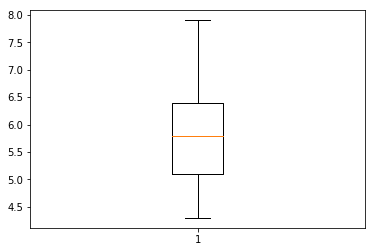

In [7]:
plt.boxplot(iris_df['SepalLengthCm'])
plt.show()

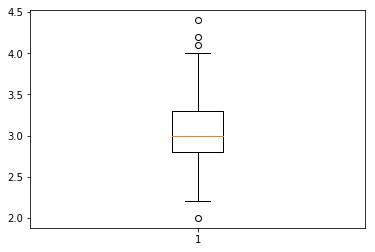

In [8]:
plt.boxplot(iris_df['SepalWidthCm'])
plt.show()

## SepalLengthCm & SepalWidthCm

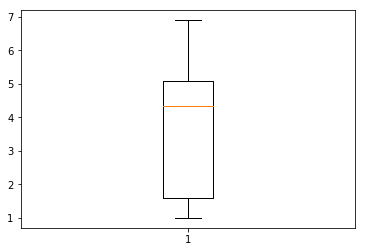

In [10]:
plt.boxplot(iris_df['PetalLengthCm'])
plt.show()

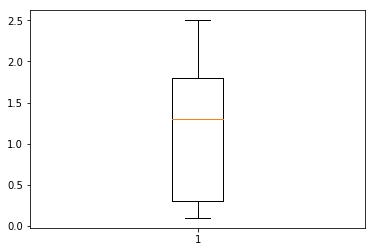

In [11]:
plt.boxplot(iris_df['PetalWidthCm'])
plt.show()

In [12]:
iris_df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

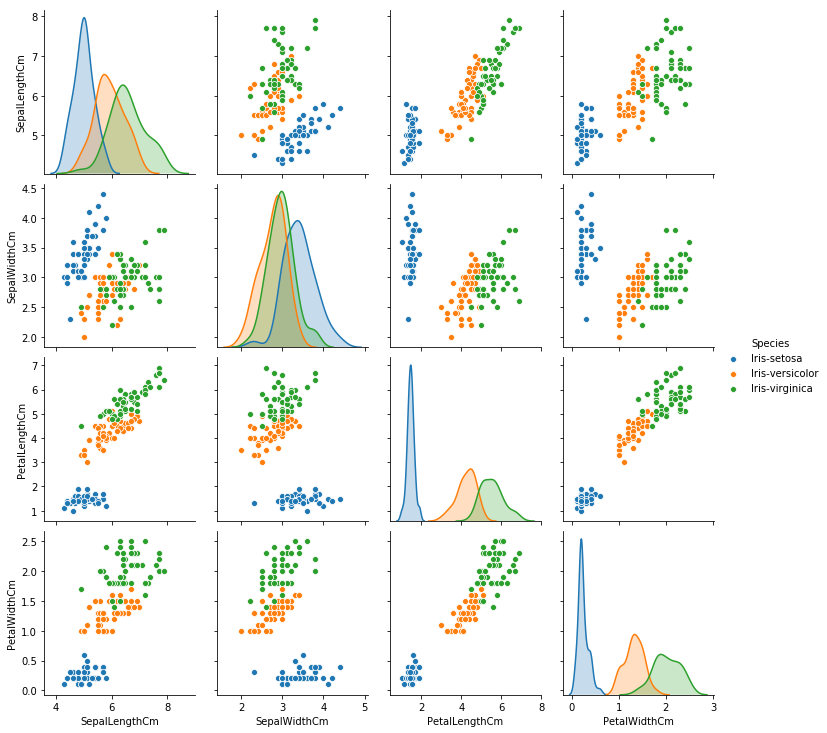

In [22]:
sns.pairplot(iris_df, diag_kind="kde", hue = "Species")

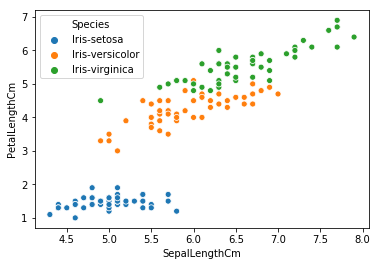

In [20]:
sns.scatterplot( x = 'SepalLengthCm', y = 'PetalLengthCm', hue = 'Species', data = iris_df)

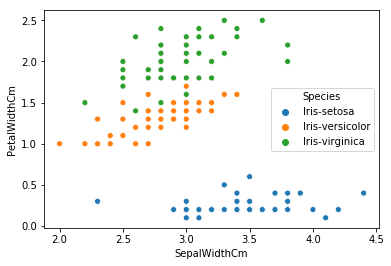

In [21]:
sns.scatterplot( x = 'SepalWidthCm', y = 'PetalWidthCm', hue = 'Species', data = iris_df)

In [18]:
# Drop the Species (target label) coloumn
X = iris_df.drop(['Species'],axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y = iris_df['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [43]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [44]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [45]:
y_train.head()

60     Iris-versicolor
116     Iris-virginica
144     Iris-virginica
119     Iris-virginica
108     Iris-virginica
Name: Species, dtype: object

In [26]:
X_train.shape

(105, 4)

In [27]:
y_train.shape

(105,)

In [28]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

In [29]:
#scaler.fit(X_train)  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  

In [30]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [31]:
# Predict the values of classified for Test data
y_predict = classifier.predict(X_test)

In [46]:
# show result 
# PK: This step need NOT be done once you get familiar. Only for initially to demonstrate

# result = {"Actual": y_test, "Predicted": y_predict}
# pd.DataFrame(result)

In [33]:
metrics.accuracy_score(y_test, y_predict)

0.9777777777777777

In [34]:
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.9714285714285714
0.9777777777777777


In [35]:
print(metrics.confusion_matrix(y_test, y_predict))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [47]:
# y_test

In [48]:
# y_predict

In [42]:
print(metrics.classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

